# Images are lists of numbers: Numpy arrays

[Numpy](https://numpy.org) is a library for processing multi-dimensional lists of numbers, of which microscopy images (stacks, multi-channel, time-lapses etc.) are a prominent example. We give here a very short introduction to this library used *indrectly* most of the time in this course via libraries like scikit-image. For more information, you can refer to the following resources:

* [Image manipulation and processing using Numpy and Scipy by Emmanuelle Gouillart and Gaël Varoquaux](https://scipy-lectures.org/advanced/image_processing/index.html#basic-image)
* [Tutorial on image segmentation with scikit-image](https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html)

## Numpy arrays

An image is just a two dimensional list of pixels values, in other words a matrix, with a certain number of rows and columns. Therefore we can define it as a list of lists, each list being a row of pixels:

In [15]:
raw_image_array = [
    [1, 0, 2, 1, 0, 0, 0],
    [0, 3, 1, 0, 1, 0, 1],
    [0, 5, 5, 1, 0, 1, 0],
    [0, 6, 6, 5, 1, 0, 2],
    [0, 0, 5, 6, 3, 0, 1],
    [0, 1, 2, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1, 0]
]
raw_image_array

[[1, 0, 2, 1, 0, 0, 0],
 [0, 3, 1, 0, 1, 0, 1],
 [0, 5, 5, 1, 0, 1, 0],
 [0, 6, 6, 5, 1, 0, 2],
 [0, 0, 5, 6, 3, 0, 1],
 [0, 1, 2, 1, 0, 0, 1],
 [1, 0, 1, 0, 0, 1, 0]]

Our desire is to be able to treat this image variable ```raw_image_array``` as one "entity". For example, just like we can define ```a = 3``` and then compute ```b = a - 3```, we would like to be able to compute ```raw_background = raw_image_array - 2``` to remove a background value of ```2``` from our image. If we try this on our current variable:

In [16]:
raw_image_array - 2

TypeError: unsupported operand type(s) for -: 'list' and 'int'

we get an error because this type of calculation **is not defined for simple Python lists**. This is where Numpy enters the game. We can simply transform our list of lists into a so-called Numpy array using the ```np.asarray``` function:

In [17]:
import numpy as np

image = np.asarray(raw_image_array)

In [18]:
image

array([[1, 0, 2, 1, 0, 0, 0],
       [0, 3, 1, 0, 1, 0, 1],
       [0, 5, 5, 1, 0, 1, 0],
       [0, 6, 6, 5, 1, 0, 2],
       [0, 0, 5, 6, 3, 0, 1],
       [0, 1, 2, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0]])

This output is almost the same as above with the difference that now it is indicated that we are dealing with a Numpy ```array```. Such Numpy arrays can now be treated as a one entity and we can perform the computation that we coudn't before:

In [19]:
image - 2

array([[-1, -2,  0, -1, -2, -2, -2],
       [-2,  1, -1, -2, -1, -2, -1],
       [-2,  3,  3, -1, -2, -1, -2],
       [-2,  4,  4,  3, -1, -2,  0],
       [-2, -2,  3,  4,  1, -2, -1],
       [-2, -1,  0, -1, -2, -2, -1],
       [-1, -2, -1, -2, -2, -1, -2]])

Note that these computations are very efficient because they are *vectorized*, i.e. they can in principle be performed in parallel.

## Two important properties

Arrays like ```image``` have different properties. Two of the most important ones are:
- the ```shape``` of the array, i.e. the number of rows, columns (and channels, planes etc. for multi-dimensional images)
- the ```dtype``` of the array, i.e. the type of its pixels such as 8bit, float etc. (as in Fiji, Image->Type)

In [20]:
image.shape

(7, 7)

In [21]:
image.dtype

dtype('int64')

## Other ways of creating arrays

Usually we do not convert lists of lists into Numpy arrays to create image arrays. We rather obtain images as arrays simply by importing them (see next chapter). Alternatively we can also create different types of new images by using Numpy functions like [```np.zeros```](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) and [```np.random.random```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random), which is sometimes good for playing with algorithms. For this we just have to specify the shape of the image in terms of number of rows and columns. ```np.zeros``` gives an image filled with zeros:

In [12]:
image_size = (3, 5)

image_zeros = np.zeros(image_size)
image_zeros

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

and ```np.random.random``` gives an image with random values (in the 0-1 range):

In [14]:
image_random = np.random.random((3, 5))
image_random

array([[0.15656684, 0.64170029, 0.35489949, 0.95730439, 0.90824715],
       [0.46300073, 0.38580745, 0.25032853, 0.19467343, 0.89511366],
       [0.36505495, 0.38060993, 0.02173237, 0.52371981, 0.35979032]])

## Computing with images

We have already seen that we can perform simple maths with these arrays. For example:

In [10]:
image_zeros + 3

array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]])

In the next chapters, we will see that we can perform other types of image processing operations with these arrays:
- Combining images e.g. by adding them (in Fiji, Process->Math)
- Applying functions to images e.g. taking the log of pixel values
- Summarizing images, e.g. by taking the mean of pixels

## Image visualization
For visualizing images, we use the [scikit-image](https://scikit-image.org) library.

c:\programs\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


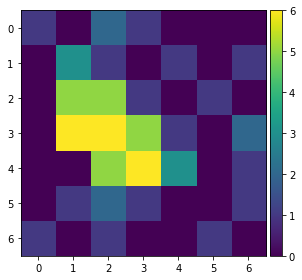

In [12]:
from skimage.io import imshow

imshow(image)